# Agenda
---
1. Load csv data in pandas dataframe
2. Querying the data from pandas dataframe
3. Analysing the data in pandas dataframe
4. Addressing missing values

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ggplot import *

### Few things about pandas data structure
- Basic unit of operation: Series
- NumPy arrays are souped-up python lists
- Pandas series is cross between list and dictionary
- Pandas is written on the top of NumPy

In [2]:
# NumPy array when loaded into pandas series
pd.Series(np.array([1, 2, 3, 4]))

0    1
1    2
2    3
3    4
dtype: int64

### Pandas DataFrame
- Collection of Pandas Series

In [3]:
employment_df = pd.DataFrame({'Countries': [
            'Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
            'Armenia', 'Australia', 'Austria'],
        
            'Employments': [
            55.70000076,  51.40000153,  50.5       ,  75.69999695,
            58.40000153,  40.09999847,  61.5       ,  57.09999847
            ]});

employment_df

,Countries,Employments
0,Afghanistan,55.700001
1,Albania,51.400002
2,Algeria,50.500000
3,Angola,75.699997
4,Argentina,58.400002
5,Armenia,40.099998
6,Australia,61.500000
7,Austria,57.099998


### Loading data into DataFrame

In [4]:
baseball_df = pd.read_csv('../data/Baseball_Master.csv')
baseball_df.head()

,playerID,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,...,nameLast,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID
0,aardsda01,1981.0,12.0,27.0,USA,CO,Denver,NaN,NaN,NaN,...,Aardsma,David Allan,205.0,75.0,R,R,4/6/2004,9/28/2013,aardd001,aardsda01
1,aaronha01,1934.0,2.0,5.0,USA,AL,Mobile,NaN,NaN,NaN,...,Aaron,Henry Louis,180.0,72.0,R,R,4/13/1954,10/3/1976,aaroh101,aaronha01
2,aaronto01,1939.0,8.0,5.0,USA,AL,Mobile,1984.0,8.0,16.0,...,Aaron,Tommie Lee,190.0,75.0,R,R,4/10/1962,9/26/1971,aarot101,aaronto01
3,aasedo01,1954.0,9.0,8.0,USA,CA,Orange,NaN,NaN,NaN,...,Aase,Donald William,190.0,75.0,R,R,7/26/1977,10/3/1990,aased001,aasedo01
4,abadan01,1972.0,8.0,25.0,USA,FL,Palm Beach,NaN,NaN,NaN,...,Abad,Fausto Andres,184.0,73.0,L,L,9/10/2001,4/13/2006,abada001,abadan01


**Getting column names**

In [5]:
baseball_df.columns

Index(['playerID', 'birthYear', 'birthMonth', 'birthDay', 'birthCountry',
       'birthState', 'birthCity', 'deathYear', 'deathMonth', 'deathDay',
       'deathCountry', 'deathState', 'deathCity', 'nameFirst', 'nameLast',
       'nameGiven', 'weight', 'height', 'bats', 'throws', 'debut', 'finalGame',
       'retroID', 'bbrefID'],
      dtype='object')

### Basic Queries

Querying with column names

In [6]:
baseball_df['playerID'].head()

0    aardsda01
1    aaronha01
2    aaronto01
3     aasedo01
4     abadan01
Name: playerID, dtype: object

In [8]:
# Querying with rows
baseball_df.iloc[0]

playerID          aardsda01
birthYear              1981
birthMonth               12
birthDay                 27
birthCountry            USA
birthState               CO
birthCity            Denver
deathYear               NaN
deathMonth              NaN
deathDay                NaN
deathCountry            NaN
deathState              NaN
deathCity               NaN
nameFirst             David
nameLast            Aardsma
nameGiven       David Allan
weight                  205
height                   75
bats                      R
throws                    R
debut              4/6/2004
finalGame         9/28/2013
retroID            aardd001
bbrefID           aardsda01
Name: 0, dtype: object

In [9]:
# Quering with respect to column value
baseball_df[baseball_df['birthCity'] == 'Denver'].head()

,playerID,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,...,nameLast,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID
0,aardsda01,1981.0,12.0,27.0,USA,CO,Denver,NaN,NaN,NaN,...,Aardsma,David Allan,205.0,75.0,R,R,4/6/2004,9/28/2013,aardd001,aardsda01
135,akerfda01,1962.0,6.0,12.0,USA,CO,Denver,2012.0,6.0,24.0,...,Akerfelds,Darrel Wayne,210.0,74.0,R,R,8/1/1986,7/2/1991,akerd001,akerfda01
1390,blatest01,1944.0,3.0,20.0,USA,CO,Denver,NaN,NaN,NaN,...,Blateric,Stephen Lawrence,200.0,75.0,R,R,9/17/1971,4/21/1975,blats101,blatest01
1640,bowlegr01,1907.0,10.0,24.0,USA,CO,Denver,1968.0,6.0,25.0,...,Bowler,Grant Tierney,190.0,72.0,R,R,8/21/1931,8/14/1932,bowlg101,bowlegr01
1700,bradlja01,1893.0,9.0,20.0,USA,CO,Denver,1969.0,3.0,18.0,...,Bradley,John Thomas,175.0,71.0,R,R,6/18/1916,7/31/1916,bradj103,bradlja01


In [10]:
# Quering with certain condition
baseball_df[(baseball_df['weight'] > 200.0) & (baseball_df['birthYear'] > 1991.0)]

,playerID,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,...,nameLast,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID
1459,bogaexa01,1992.0,10.0,1.0,Aruba,NaN,Oranjestad,NaN,NaN,NaN,...,Bogaerts,Xander Jan,210.0,73.0,R,R,8/20/2013,9/27/2014,bogax001,bogaexa01
2658,casteni01,1992.0,3.0,4.0,USA,FL,Davie,NaN,NaN,NaN,...,Castellanos,Nicholas A.,210.0,76.0,R,R,9/1/2013,9/28/2014,castn001,casteni01
5141,fernajo02,1992.0,7.0,31.0,Cuba,Villa Clara,Santa Clara,NaN,NaN,NaN,...,Fernandez,Jose D.,225.0,74.0,R,R,4/7/2013,5/9/2014,fernj003,fernajo02
6932,harpebr03,1992.0,10.0,16.0,USA,NV,Las Vegas,NaN,NaN,NaN,...,Harper,Bryce Aron Max,225.0,75.0,L,R,4/28/2012,9/28/2014,harpb003,harpebr03
14773,santado01,1992.0,8.0,5.0,D.R.,Distrito Nacional,Santo Domingo,NaN,NaN,NaN,...,Santana,Domingo Alberto,225.0,77.0,R,R,7/1/2014,8/11/2014,santd002,santado01
15788,solerjo01,1992.0,2.0,25.0,Cuba,La Habana,La Habana,NaN,NaN,NaN,...,Soler,Jorge Carlos,215.0,76.0,R,R,8/27/2014,9/28/2014,solej001,solerjo01
17441,walketa01,1992.0,8.0,13.0,USA,LA,Shreveport,NaN,NaN,NaN,...,Walker,Taijuan Emmanuel,230.0,76.0,R,R,8/30/2013,9/24/2014,walkt004,walketa01


**Note:** As based on NumPy updates to all the above views will mutate the original dataframe

In [13]:
# Compare 2 columns side by side
colum_compare = baseball_df['birthState'] + ", " +  baseball_df['height'].astype(str)
colum_compare.head()

0    CO, 75.0
1    AL, 72.0
2    AL, 75.0
3    CA, 75.0
4    FL, 73.0
dtype: object

In [11]:
# Calculating mean of all the groups
baseball_groups = baseball_df.groupby('birthState')
mean_from_each_state = baseball_groups.mean().head(20)
mean_from_each_state = pd.DataFrame(mean_from_each_state.to_records())

mean_from_each_state.head()

,birthState,birthYear,birthMonth,birthDay,deathYear,deathMonth,deathDay,weight,height
0,AB,1938.111111,7.222222,11.625000,1992.333333,6.666667,11.000000,188.125000,73.750000
1,AK,1965.909091,7.000000,15.000000,1944.000000,8.000000,16.000000,198.636364,73.000000
2,AL,1936.221184,6.423676,15.218069,1981.888889,6.580247,16.351852,185.705329,72.546875
3,AR,1928.986842,6.782895,15.690789,1979.267442,6.313953,15.790698,182.763158,72.467105
4,AZ,1963.949495,6.929293,16.353535,1986.333333,6.583333,15.166667,195.161616,73.373737


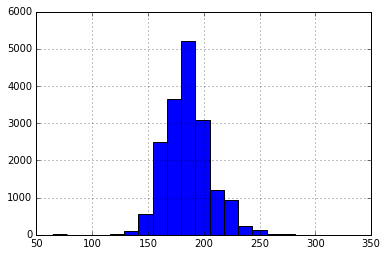

In [12]:
# Plotting for exploration
# Referrence: http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.hist.html
baseball_df['weight'].hist(bins=20)

## Addressing missing value

Describing the data to get its quality

In [13]:
baseball_df.describe()

,birthYear,birthMonth,birthDay,deathYear,deathMonth,deathDay,weight,height
count,18444.000000,18274.000000,18117.000000,9225.000000,9224.000000,9223.000000,17717.000000,17780.000000
mean,1929.851496,6.625534,15.618977,1963.294309,6.485581,15.546677,185.562680,72.235264
std,40.907143,3.465354,8.748973,31.193396,3.522301,8.781102,20.998279,2.598992
min,1820.000000,1.000000,1.000000,1872.000000,1.000000,1.000000,65.000000,43.000000
25%,1894.000000,4.000000,8.000000,1941.000000,3.000000,8.000000,170.000000,71.000000
50%,1935.000000,7.000000,16.000000,1966.000000,6.000000,15.000000,185.000000,72.000000
75%,1967.000000,10.000000,23.000000,1988.000000,10.000000,23.000000,197.000000,74.000000
max,1994.000000,12.000000,31.000000,2014.000000,12.000000,31.000000,320.000000,83.000000


The count present in the first row indicates that the we have missing values

### Reasons for missing values
1. Occassional system errors may prevent data being recorded
2. Non response

### Problems with missing values
1. Missing values can lead to false conclusion
2. It's ok to have random missing values. But systematic missing values are harmful

### Addressing missing values
1. Partial deletion
    - List wise deletion
    - Pairwaise deletion
2. Impution
    - Filling the missing values with **mean**
    - Linear regression

In [14]:
print(baseball_df['weight'].describe())
baseball_df['weight'] = baseball_df['weight'].fillna(baseball_df['weight'].mean())
print('\n\n')
print(baseball_df['weight'].describe())

count    17717.000000
mean       185.562680
std         20.998279
min         65.000000
25%        170.000000
50%        185.000000
75%        197.000000
max        320.000000
Name: weight, dtype: float64



count    18589.000000
mean       185.562680
std         20.499828
min         65.000000
25%        170.000000
50%        185.000000
75%        195.000000
max        320.000000
Name: weight, dtype: float64
